In [1]:
import numpy as np
import pandas as pd
import random as rd
import math
import seaborn as sns
from matplotlib import pyplot
from heapq import heappush, heappop

In [2]:
pillow = pd.read_csv("SaYoPillow.csv")
pillow.head()

,snoring,respiration,temperature,limb,oxygen,eye,hours,heart,stress
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [3]:
 sns.pairplot(pillow, hue='stress', markers='+')

In [4]:
pillow.describe()

,snoring,respiration,temperature,limb,oxygen,eye,hours,heart,stress
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


In [5]:
class DataProcessing:
    @staticmethod 
    def shuffle(x): # metoda tasujaca zbior
        x=x.copy()
        for i in range(len(x)-1):
            j=rd.randint(0,i)
            x.iloc[i], x.iloc[j]=x.iloc[j], x.iloc[i]
        return x
    
    @staticmethod 
    def splitSet(x): # metoda dzielaca zbior
        x=x.copy()
        n=int(len(x)*0.7)
        xTrain=x[:n]
        xVal=x[n:]
        return xTrain, xVal

    @staticmethod 
    def normalize(x): # metoda normalizujaca dane
        x=x.copy()
        values=x.select_dtypes(exclude="object")
        columnNames=values.columns.tolist()
        columnNames.remove("stress")
        
        # znalezienie wartosci skrajnych w kolumnie
        for column in columnNames:
            data=x.loc[:,column]
            max1=max(data)
            min1=min(data)
            
            # normalizacja wartosci w kolumnie
            for row in range(len(x)):
                newValue=((x.at[row,column]-min1)/(max1-min1))
                x.at[row, column]=newValue
        return x

In [6]:
pillow.head()

,snoring,respiration,temperature,limb,oxygen,eye,hours,heart,stress
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [7]:
# pillow = DataProcessing.shuffle(pillow) # tasowanie niewymagane - zbior jest juz wymieszany

In [8]:
pillow.head()

,snoring,respiration,temperature,limb,oxygen,eye,hours,heart,stress
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [9]:
pillowNorm=DataProcessing.normalize(pillow)

In [10]:
pillowNorm.head()

,snoring,respiration,temperature,limb,oxygen,eye,hours,heart,stress
0,0.887273,0.691429,0.488571,0.840000,0.522667,0.880000,0.204444,0.691429,3
1,0.848000,0.650286,0.468000,0.792000,0.503467,0.864000,0.172444,0.650286,3
2,0.272727,0.285714,0.785714,0.400000,0.866667,0.555556,0.777778,0.285714,1
3,0.741091,0.538286,0.412000,0.661333,0.451200,0.820444,0.085333,0.538286,3
4,0.056727,0.089143,0.919429,0.166400,0.949867,0.277333,0.916444,0.089143,0


In [11]:
pillowTrain, pillowTest = DataProcessing.splitSet(pillow)

In [12]:
pillowNormTrain, pillowNormTest = DataProcessing.splitSet(pillowNorm)

In [13]:
pillowTrain.head(),pillowTrain.head()

(   snoring  respiration  temperature    limb  oxygen    eye  hours  heart  \
 0    93.80       25.680       91.840  16.600  89.840  99.60  1.840  74.20   
 1    91.64       25.104       91.552  15.880  89.552  98.88  1.552  72.76   
 2    60.00       20.000       96.000  10.000  95.000  85.00  7.000  60.00   
 3    85.76       23.536       90.768  13.920  88.768  96.92  0.768  68.84   
 4    48.12       17.248       97.872   6.496  96.248  72.48  8.248  53.12   
 
    stress  
 0       3  
 1       3  
 2       1  
 3       3  
 4       0  ,
    snoring  respiration  temperature    limb  oxygen    eye  hours  heart  \
 0    93.80       25.680       91.840  16.600  89.840  99.60  1.840  74.20   
 1    91.64       25.104       91.552  15.880  89.552  98.88  1.552  72.76   
 2    60.00       20.000       96.000  10.000  95.000  85.00  7.000  60.00   
 3    85.76       23.536       90.768  13.920  88.768  96.92  0.768  68.84   
 4    48.12       17.248       97.872   6.496  96.248  72.48 

In [14]:
pillowNorm.describe()

,snoring,respiration,temperature,limb,oxygen,eye,hours,heart,stress
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,0.483636,0.414286,0.557143,0.513333,0.593333,0.633333,0.411111,0.414286,2.000000
std,0.352233,0.283294,0.252121,0.286642,0.260166,0.264305,0.339397,0.283294,1.415337
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.136364,0.178571,0.392857,0.300000,0.433333,0.472222,0.055556,0.178571,1.000000
50%,0.454545,0.357143,0.571429,0.466667,0.600000,0.666667,0.388889,0.357143,2.000000
75%,0.840909,0.642857,0.750000,0.783333,0.816667,0.861111,0.722222,0.642857,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [15]:
class KNN:
    @staticmethod
    def metric(v1, v2, m): # metoda obliczajaca odleglosc
        tmp = 0
        for i in range(len(v1)-1):
            tmp += abs(v1[i] - v2[i])**m
        return tmp**(1/m)
    
    @staticmethod
    def classify(sample, X, C, k, m):
        # utworzenie slownika na podstawie nazw klas
        classes = {}
        for cls in C:
            classes[cls] = 0
        
        # obliczenie odleglosci probki od kazdego rekordu w zbiorze
        distances = []
        for i in range(len(X)):
            distances.append(KNN.metric(sample, X.iloc[i], m))
        
        # sortowanie (stogowe) zbioru wzgledem odleglosci
        heap = []
        for i in range(len(X)):
            heappush(heap, (distances[i], X.iloc[i].stress))
        
        # glosowanie
        for i in range(0, k):
            classes[heappop(heap)[1]] += 1
        
        return max(classes, key = classes.get)

In [16]:
NEIGHBORS_NUMBER = 5
DISTANCE_PARAMETER = 2

In [17]:
actual = pillowTest["stress"].copy()
predicted = [] # wyniki klasyfikacji nieznormalizowanego zbioru testowego
for i in range(len(pillowTest)):
    predicted.append(KNN.classify(pillowTest.iloc[i], pillowTrain, pillowTrain["stress"], NEIGHBORS_NUMBER, DISTANCE_PARAMETER))

Predicted   0   1   2   3   4
Actual                       
0          37   0   0   0   0
1           0  42   0   0   0
2           0   0  37   0   0
3           0   0   0  38   0
4           0   0   0   0  35
 Accuracy: 1.000
Precision: 1.000
   Recall: 1.000
       F1: 1.000


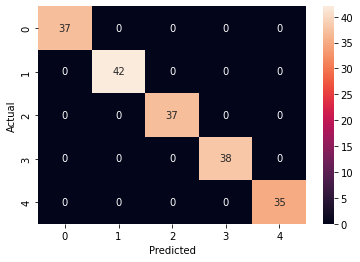

In [18]:
data = {'y_Actual':    actual,
        'y_Predicted': predicted
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
plot = sns.heatmap(confusion_matrix, annot=True)
fig = plot.get_figure()
fig.savefig('KNNplot.png', dpi=300)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, average="weighted")
recall = recall_score(actual, predicted, average="weighted")
f1 = f1_score(actual, predicted, average="weighted")

print(" Accuracy: %.3f" %accuracy)
print("Precision: %.3f" %precision)
print("   Recall: %.3f" %recall)
print("       F1: %.3f" %f1)

In [19]:
actualN = pillowNormTest["stress"].copy()
predictedN = [] # wyniki klasyfikacji znormalizowanego zbioru testowego
for i in range(len(pillowTest)):
    predictedN.append(KNN.classify(pillowNormTest.iloc[i], pillowNormTrain, pillowNormTrain["stress"], NEIGHBORS_NUMBER, DISTANCE_PARAMETER))

Predicted   0   1   2   3   4
Actual                       
0          37   0   0   0   0
1           0  42   0   0   0
2           0   0  37   0   0
3           0   0   0  38   0
4           0   0   0   0  35
 Accuracy: 1.000
Precision: 1.000
   Recall: 1.000
       F1: 1.000


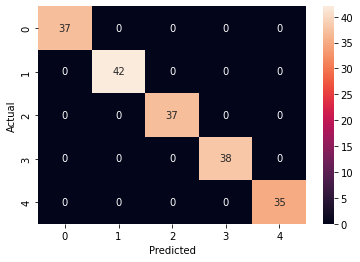

In [20]:
dataN = {'y_Actual':    actualN,
        'y_Predicted': predictedN
        }

dfN = pd.DataFrame(dataN, columns=['y_Actual','y_Predicted'])
confusion_matrixN = pd.crosstab(dfN['y_Actual'], dfN['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrixN)
plotN = sns.heatmap(confusion_matrixN, annot=True)
figN = plotN.get_figure()
figN.savefig('KNNplotNorm.png', dpi=300)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracyN = accuracy_score(actualN, predictedN)
precisionN = precision_score(actualN, predictedN, average="weighted")
recallN = recall_score(actualN, predictedN, average="weighted")
f1N = f1_score(actualN, predictedN, average="weighted")

print(" Accuracy: %.3f" %accuracyN)
print("Precision: %.3f" %precisionN)
print("   Recall: %.3f" %recallN)
print("       F1: %.3f" %f1N)

In [21]:
#
# KNN from sklearn
#

In [22]:
pillowTrainX = pillowTrain.iloc[:, :-1].values
pillowTrainY = pillowTrain.iloc[:, 8].values

pillowTestX = pillowTest.iloc[:, :-1].values
pillowTestY = pillowTest.iloc[:, 8].values

pillowNormTrainX = pillowNormTrain.iloc[:, :-1].values
pillowNormTrainY = pillowNormTrain.iloc[:, 8].values

pillowNormTestX = pillowNormTest.iloc[:, :-1].values
pillowNormTestY = pillowNormTest.iloc[:, 8].values

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = NEIGHBORS_NUMBER, p = DISTANCE_PARAMETER)
classifier.fit(pillowTrainX, pillowTrainY)

y_pred = classifier.predict(pillowTestX)

Predicted   0   1   2   3   4
Actual                       
0          37   0   0   0   0
1           0  42   0   0   0
2           0   0  37   0   0
3           0   0   0  38   0
4           0   0   0   0  35
 Accuracy: 1.000
Precision: 1.000
   Recall: 1.000
       F1: 1.000


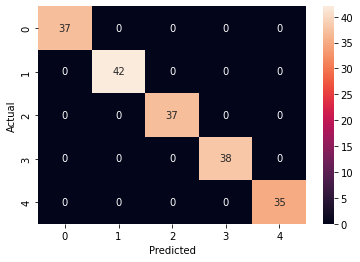

In [24]:
dataSK = {'y_Actual':  pillowTestY,
        'y_Predicted': y_pred
        }

dfSK = pd.DataFrame(dataSK, columns=['y_Actual','y_Predicted'])
confusion_matrixSK = pd.crosstab(dfSK['y_Actual'], dfSK['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrixSK)
plotSK = sns.heatmap(confusion_matrixSK, annot=True)
figSK = plotSK.get_figure()
figSK.savefig('KNNplot-SKLearn.png', dpi=300)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracySK = accuracy_score(pillowTestY, y_pred)
precisionSK = precision_score(pillowTestY, y_pred, average="weighted")
recallSK = recall_score(pillowTestY, y_pred, average="weighted")
f1SK = f1_score(pillowTestY, y_pred, average="weighted")

print(" Accuracy: %.3f" %accuracySK)
print("Precision: %.3f" %precisionSK)
print("   Recall: %.3f" %recallSK)
print("       F1: %.3f" %f1SK)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = NEIGHBORS_NUMBER, p = DISTANCE_PARAMETER)
classifier.fit(pillowNormTrainX, pillowNormTrainY)

y_pred_norm = classifier.predict(pillowNormTestX)

Predicted   0   1   2   3   4
Actual                       
0          37   0   0   0   0
1           0  42   0   0   0
2           0   0  37   0   0
3           0   0   0  38   0
4           0   0   0   0  35
 Accuracy: 1.000
Precision: 1.000
   Recall: 1.000
       F1: 1.000


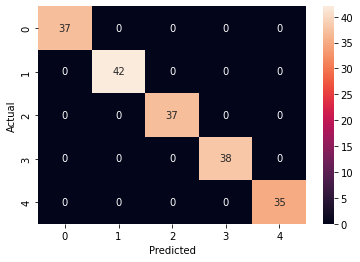

In [26]:
dataSKN = {'y_Actual': pillowNormTestY,
        'y_Predicted': y_pred_norm
        }

dfSKN = pd.DataFrame(dataSKN, columns=['y_Actual','y_Predicted'])
confusion_matrixSKN = pd.crosstab(dfSKN['y_Actual'], dfSKN['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrixSKN)
plotSKN = sns.heatmap(confusion_matrixSKN, annot=True)
figSKN = plotSKN.get_figure()
figSKN.savefig('KNNplotNorm-SKLearn.png', dpi=300)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracySKN = accuracy_score(pillowNormTestY, y_pred_norm)
precisionSKN = precision_score(pillowNormTestY, y_pred_norm, average="weighted")
recallSKN = recall_score(pillowNormTestY, y_pred_norm, average="weighted")
f1SKN = f1_score(pillowNormTestY, y_pred_norm, average="weighted")

print(" Accuracy: %.3f" %accuracySKN)
print("Precision: %.3f" %precisionSKN)
print("   Recall: %.3f" %recallSKN)
print("       F1: %.3f" %f1SKN)